# Extra Lab - Multivariate Data 


Let's continue our discussion of bivariate data analysis a little bit using the housing prices data as well as the abdominal circumference data.

Can we say that abdominal circumference varies with gestation period? Generally, we can it is true. We can try to prove or disprove this assumption by analyzing the data. Read the dataset into a dataframe object called 'ac_data'.

In [1]:
ac_data=read.csv("/dsa/data/all_datasets/abdominal circumference/ac.csv")
head(ac_data)

,id,gawks,ac
,<int>,<dbl>,<int>
1,1,12.28571,59
2,2,12.28571,64
3,3,12.28571,56
4,4,12.42857,61
5,5,12.71429,74
6,6,12.71429,60


When you look at the first few rows you can't say for sure if long gestation periods will correlate with abdominal circumference. Let's get into the descriptive statistics of the data...

In [2]:
summary(ac_data)

       id            gawks             ac       
 Min.   :  1.0   Min.   :12.29   Min.   : 56.0  
 1st Qu.:153.2   1st Qu.:20.00   1st Qu.:153.0  
 Median :305.5   Median :27.00   Median :227.0  
 Mean   :305.5   Mean   :27.27   Mean   :226.7  
 3rd Qu.:457.8   3rd Qu.:34.43   3rd Qu.:303.8  
 Max.   :610.0   Max.   :42.43   Max.   :404.0  

We are not sure if the data is normally distributed for both gawks and ac variables, but the data looks fine. There are no NA values.  Let's check the data type of variables using the str() command.

In [3]:
str(ac_data)

'data.frame':	610 obs. of  3 variables:
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gawks: num  12.3 12.3 12.3 12.4 12.7 ...
 $ ac   : int  59 64 56 61 74 60 75 63 62 67 ...


From the histograms we plotted in Vector.ipynb lab the data was looking normally distributed, but histograms tell us nothing about the relationship between the two variables, such as if its linear, non-linear, or no relationship at all. Scatter plots are the best way to visualize data to identify relationships.

`geom_smooth()` using formula 'y ~ x'



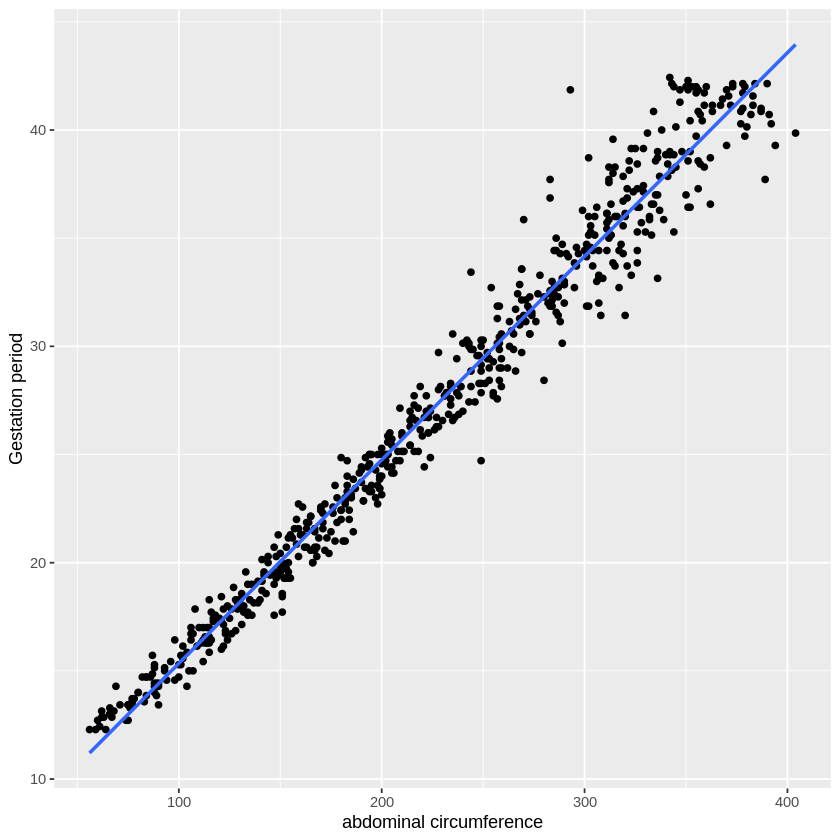

In [39]:
library(ggplot2)

ggplot(ac_data,aes(ac,gawks))+geom_point()+    
        geom_smooth(method=lm,   # Add linear regression line
                se=FALSE)  +  # Don't add shaded confidence region
xlab("abdominal circumference")+
ylab("Gestation period")

The plot above tells us that there is definitely a positive linear relationship between ac and gawks. So, bivariate data analysis can identify relationships among variables. When there are just few features in a dataset, then you make visualizations to identify the relationships but if there are 100 features you can't plot graphs for all of them. 

We will end up using numerical statistics when dimensions get large. So how do we know if two variables are related without plotting a graph against each other. There are functions in `R` which identifies/calculates how two variables are related. One of the common methods/functions to do that is discussed below.   

### Pearson correlation coefficient
----


Recall that the Pearson product-moment correlation coefficient is a measure of the strength of the linear relationship between two variables. If the relationship between the variables is not linear, then the correlation coefficient does not adequately represent the strength of the relationship between the variables and other methods must be used.

Remember that Pearson's r (r is the symbol used to denote correlation coefficient) can range from -1 to 1. An r of -1 indicates a perfect negative linear relationship between variables, an r of 0 indicates no linear relationship between variables, and an r of 1 indicates a perfect positive linear relationship between variables.

To calculate the Pearson (linear) correlation coefficient for a pair of variables, you can use the “cor.test()” function in R.

##### Positive correlation


In [5]:
cor.test(ac_data$gawks,ac_data$ac)


	Pearson's product-moment correlation

data:  ac_data$gawks and ac_data$ac
t = 147.49, df = 608, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9839690 0.9883127
sample estimates:
      cor 
0.9863109 


The correlation coefficient, which is about 0.9863109, is a very strong positive correlation. The P-value for the statistical test of whether the correlation coefficient is significantly different from zero is 02.2e-16 is very smaller than 0.05 (which is used as a cutoff for statistical significance). So there is very strong evidence that the correlation is non-zero.

##### Negative correlation

When the correlation coefficient is negative then there would be negative correlation between variables. Again if the P-value is smaller than 0.05 (which is used as a cutoff for statistical significance) we can say the correlation coefficient is different than 0.

##### Zero correlation

When the correlation coefficient is nearly equal to zero, there will be no correlation between variables. The P-value will be larger than 0.05 indicating correlation is zero.

So the sign of the pearson's r value doesn't matter for determining if the relationship is non-zero. Either positive or negative, the r value tells us how much one variable can explain the variability in other variable.

----


We have seen how to analyze bivariate data using scatter plots. Advancing our discussion into multivariate data analysis, you will generally start with univariate data analysis followed by bivariate data analysis before plotting complex 3d plots for multivariate data analysis. 

Let's start the discussion by loading the housing prices data into a dataframe called `housing_prices`. We will skip univariate and bivariate analysis since we have seen that in previous labs. 

### Loading data...

In [6]:
housing_prices <- read.csv("/dsa/data/all_datasets/house_sales_in_king_county/kc_house_data.csv")

As usual, let's take a quick look at the data to make sure we read the data correctly into the dataframe...

In [7]:
head(housing_prices)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [8]:
#The structure of the dataframe as follows
str(housing_prices)

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated :

Str() gave us an overall sense of the data. The data is a combination of numeric and integer variables. We will not be worried about id and data variables since they are non predictors. Let's dig deep into the data by first doing some univariate analysis, just like what we did in module 1. 

Run a summary() on all variables...

In [9]:
summary(housing_prices)

       id                date               price            bedrooms     
 Min.   :1.000e+06   Length:21613       Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   Class :character   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   Mode  :character   Median : 450000   Median : 3.000  
 Mean   :4.580e+09                      Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09                      3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09                      Max.   :7700000   Max.   :33.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000  
 Max.   :8.000   Max.   :13540   Max.   :1651359   Max.   :3.500  
   wat

### Multivariate Data Analysis Using Plots

We have seen in previous labs that Bedrooms, bathrooms, sqft_living, grade, sqft_above, sqft_basement vary linearly with price of the house. These might be the most decisive variables in predicting price of the house. floors, yr_built, yr_renovated, condition, lat and long tend to have positive correlation with price. Let's plot condition and floors variables against price to look into them in detail. We will use view as another dimension in these plots. 

In [41]:
ggplot(housing_prices, aes(x=condition,y=price)) + xlab("condition")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm(y~x))
    
ggplot(housing_prices, aes(x=floors,y=price)) + xlab("floors")+ ylab("Price") + 
    geom_point(aes(colour = factor(view))) + geom_smooth(method=lm(y~x))

ERROR: Error in eval(predvars, data, env): object 'y' not found


Condition does not vary much with price but floors varies positively with price. Floors can be a predictor. The relationship between lattitude, longitude and price could also be interesting. To see how they vary together lets try to plot all three variables in a three dimensional plot with view as 4th dimension.

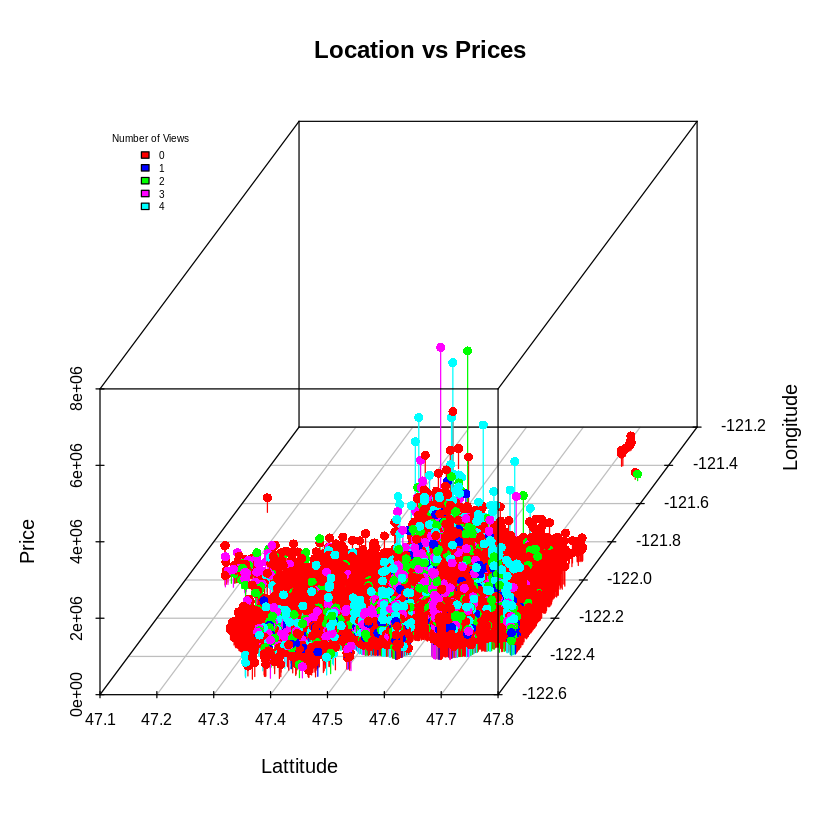

In [11]:
library(scatterplot3d)
#Assigning a color to each view
housing_prices$colors[housing_prices$view==0] <- "red"
housing_prices$colors[housing_prices$view==1] <- "blue"
housing_prices$colors[housing_prices$view==2] <- "green"
housing_prices$colors[housing_prices$view==3] <- "magenta"
housing_prices$colors[housing_prices$view==4] <- "cyan"


with(housing_prices, {
   scatterplot3d(lat, long, price,        # x y and z axis
                 type="h",             # lines to the horizontal plane
                 angle = 45,pch = 16,color=colors, #angle=45 denotes how the graph is oriented, pch=16 denotes shape used to denote 
                                        #points on the plot, color=colors tells the graph to use colors variables defined above
                 main="Location vs Prices",        
                 xlab="Lattitude",
                 ylab="Longitude",
                 zlab="Price")

legend("topleft", inset=.05,      # location where the legend should be positioned on the graph
    bty="n", cex=.5,              # suppress legend box, shrink text 50%
    title="Number of Views", 
    c("0", "1", "2", "3", "4"), fill=c("red", "blue", "green", "magenta", "cyan"))
})

The plot is very difficult to interpret. We were hoping to see a pattern in the house prices with geographic coordinates data. You can rotate the angle of the graph from 45 to any degree 0 to 360, but plot doesn't get any better for interpretation. The problem is there are too many data points and they are clustered very close to each other. 

Since we have geographic location coordinates, we can try plotting the data on a google map. A google map may be more readable than a 3d plot. While lat and long are X and Y cordinates, view will be the 3rd dimension in the plot.

In [12]:
library(ggmap)

apikey <- scan("/dsa/data/all_datasets/ggmap_api_key.txt", what="character")
register_google(key = apikey)


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



Source : https://maps.googleapis.com/maps/api/staticmap?center=Kings%20County,%20Washington&zoom=9&size=640x640&scale=2&maptype=roadmap&language=en-EN&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Kings+County,+Washington&key=xxx



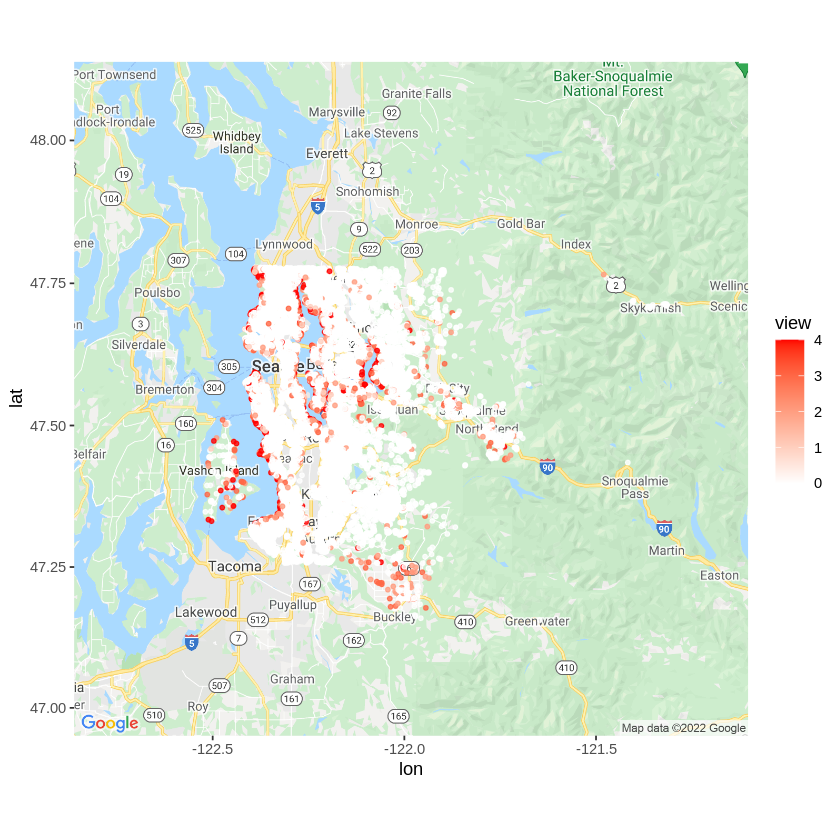

In [13]:
#get_map() will download the map from the source specified for the location you supplied as argument. There are different 
#options available for arguments source and maptype. We need the map for Kings county, Washington. 
map <- get_map(location = 'Kings County, Washington', source = 'google', maptype = 'roadmap',zoom = 9) 

#ggmap() function plots the actual map collected above. lat and long are labelled on the plot as x and y values. A view of 4 
#will be colored red while a view of 1 is colored white. The scale_colour_gradient() used below helps a smooth transition from 
#red to white color in case of different view levels(0 to 5).
ggmap(map) +  geom_point(data=housing_prices,aes(x = long,y = lat,color=view),size=1, alpha = 0.8) +
scale_colour_gradient( low="white", high="red", space="Lab")

Although above graph doesn't tell us anything about the price and its relationship to lattitude, longitude, or view variables it makes a lot of sense compared to above plot. All the houses near the river or lake have more views (3 or 4) and will be priced more compared to houses with less views as a general assumption. 

Let's plot only those houses whose price is greater than 2 million. We will use price as the 3rd dimension and views as 4th dimension.

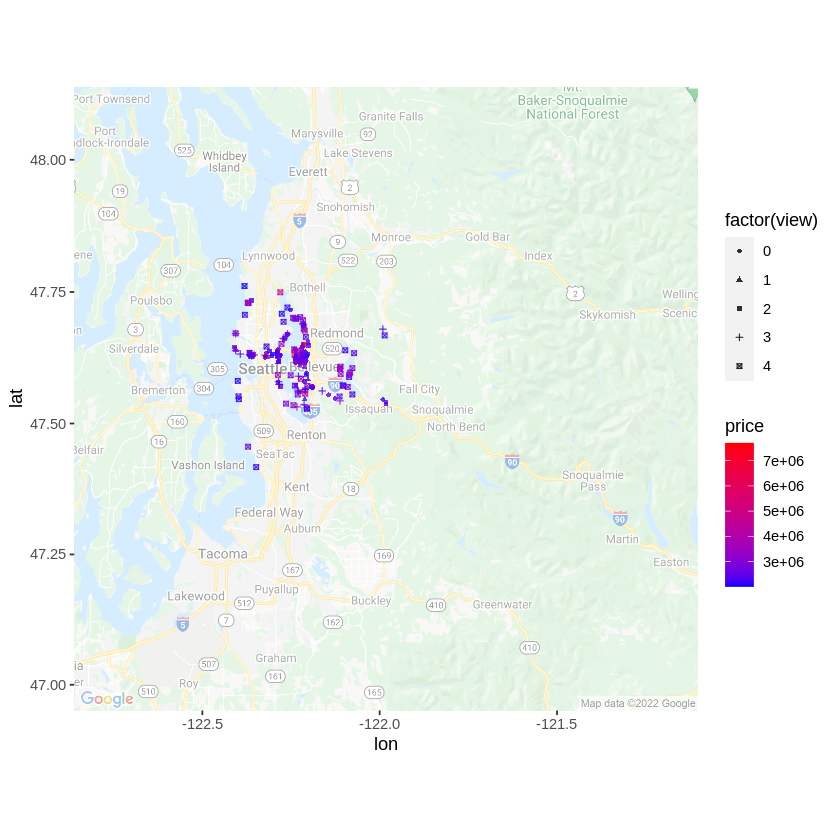

In [14]:
#We are using dplyr function subset() here. "subset(housing_prices,housing_prices$price>2000000 )" is taking housing_prices 
#data and subsetting the records where price is > 2 million
ggmap(map,darken = c(.5,"white")) +  geom_point(data=subset(housing_prices,housing_prices$price>2000000 ),
                         aes(x = long,y = lat,color=price,shape=factor(view)),size=1, alpha = 0.8) +
                         scale_colour_gradient( low="blue", high="red", space="Lab")

In [15]:
table(housing_prices$price>2000000)
table(housing_prices$price>4000000)
table(housing_prices$price>6000000)


FALSE  TRUE 
21415   198 


FALSE  TRUE 
21602    11 


FALSE  TRUE 
21610     3 

Run the cell above. In plot above we tried to plot houses with prices greater than `$2` million along with their respective number of views on the google map. As shown above there are only 198 houses with price greater than `$2` million, 11 houses with price greater than `$4` million, and 3 houses with price greater than `$6` million. We used price as the third dimension in the form of color option and view is used as fourth dimension in the form of shape argument. 

We were hoping to see more red(higher price) than green. The data is skewed; in other words, there are not many houses with prices at the extreme end of 7.7 million. Most of the houses are in the range of 2 million to 3 million. Let's try to plot the same plot again with price greater than 4 million.

Source : https://maps.googleapis.com/maps/api/staticmap?center=Kings%20County,%20Washington&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN&key=xxx

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Kings+County,+Washington&key=xxx



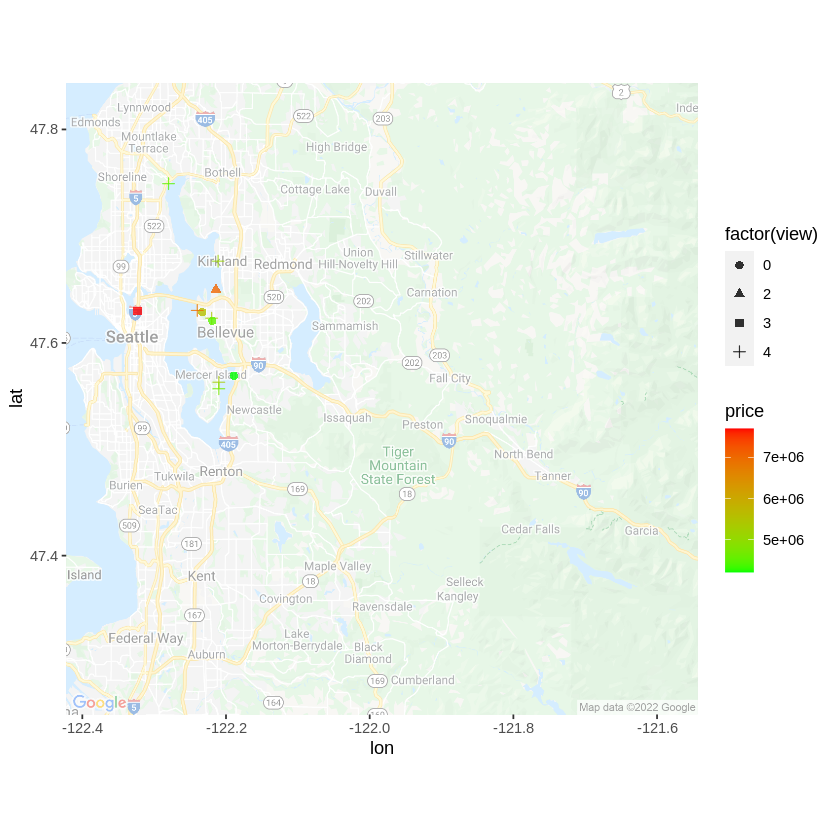

In [16]:
map <- get_map(location = 'Kings County, Washington', source = 'google', maptype = 'roadmap',zoom = 10) 
ggmap(map,darken = c(.5,"white")) +  geom_point(data=subset(housing_prices,housing_prices$price>4000000 ),
                         aes(x = long,y = lat,color=price,shape=factor(view)),size=2, alpha = 0.8) +
                         scale_colour_gradient( low="green", high="red", space="Lab")

Our assumption that high priced houses will have either 3 or 4 views was wrong. If you look at the plot above you will see that 3 houses have 0 views, 1 house has 2 views, 1 house has 3 views, and 5 houses have 4 views. 

Of all the independent variables, sqft_living and bathrooms are the two variables which are related to price the most; in other words, they vary most with price. Both variables are numeric. We used price as our third dimension in the plot above. You can use either bathrooms or sqft_living as the fourth dimension, like the size parameter as shown below. 

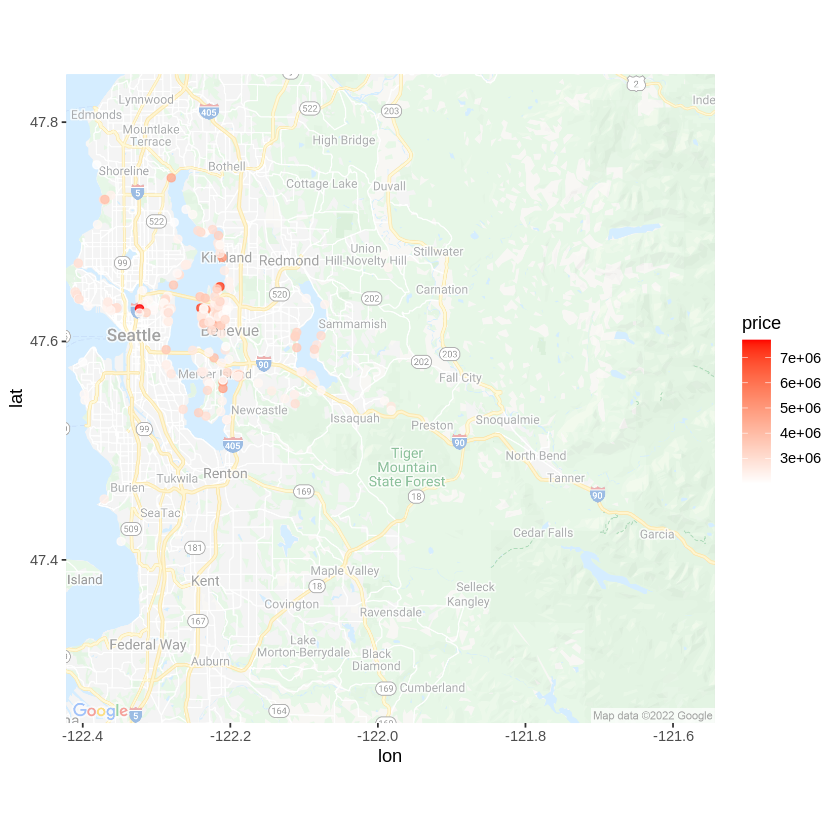

In [17]:
ggmap(map,darken = c(.5,"white")) +  geom_point(data=subset(housing_prices,housing_prices$price>2000000),
                         aes(x = long,y = lat,color=price,size=housing_prices$bathrooms),size=2,alpha = 0.8)+
                         scale_size_continuous(range=range(housing_prices$bathrooms)) +
                        scale_colour_gradient( low="white", high="red", space="Lab")

The plot above doesn't tell us anything different from the previous plots and the size of the points do not increase with number of bathrooms. 

Can we add a 5th dimension to the plot? Maybe view or sqft_living or grade or yr_renovated could be added as 5th dimension? The only option that is left to add another dimension is shape. The argument for the shape parameter should be a factor, where the number of levels cannot exceed 6. grade or yr_renovated have more than 6 levels. sqft_living is numeric and has a long range of values, so we cannot use that feature as well. So, we are stuck with view again as our 5th dimension. We can try different variables for color and size parameters though.

In the graph below, we have two different plots for data with house prices greater than 2 million and views less than 3 and greater than or equal to 3. 

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message:
“Removed 1 rows containing missing values (geom_rect).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


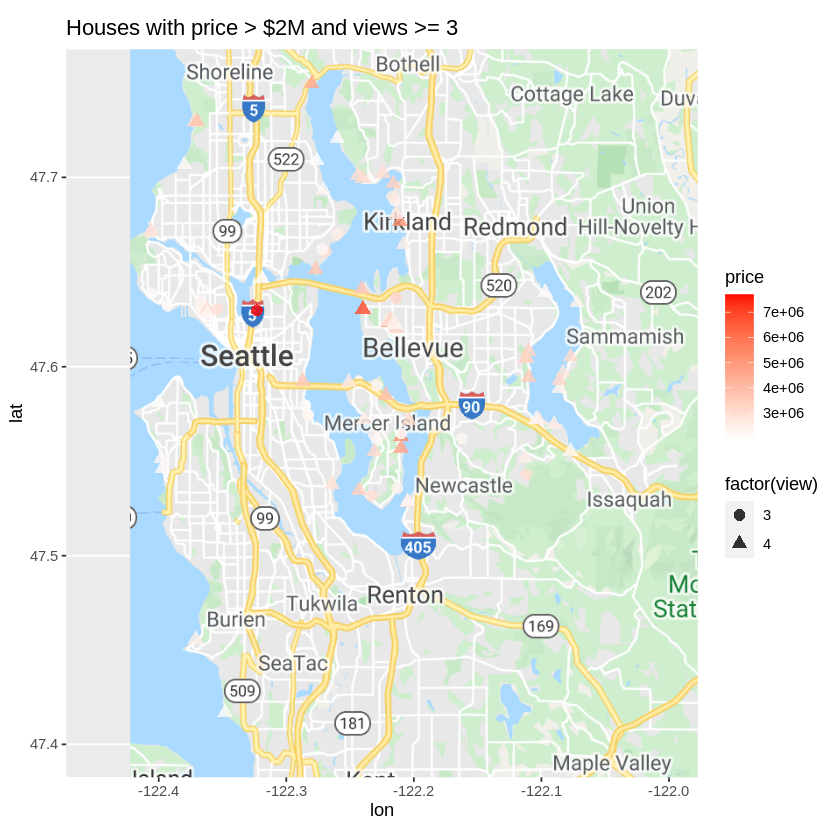

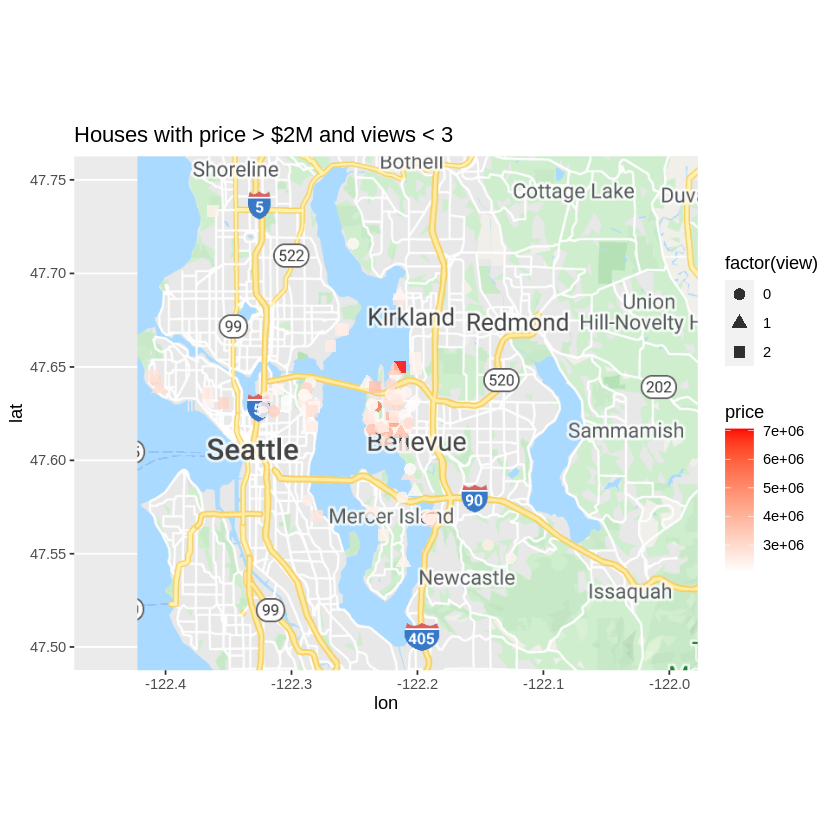

In [18]:
plot1 = ggmap(map,darken = c(.5,"white")) +  
       geom_point(data=subset(housing_prices,price>2000000 & view>=3),
                  aes(x = long,y = lat,color=price,size=housing_prices$bathrooms,shape=factor(view)),size=3,alpha = 0.8)+
                  scale_size_continuous(range=range(housing_prices$bathrooms)) +
                  scale_colour_gradient( low="white", high="red", space="Lab")

plot2 = ggmap(map,darken = c(.5,"white")) +  
       geom_point(data=subset(housing_prices,price>2000000 & view<3),
                  aes(x = long,y = lat,color=price,size=housing_prices$bathrooms,shape=factor(view)),size=3,alpha = 0.8)+
                  scale_size_continuous(range=range(housing_prices$bathrooms)) +
                  scale_colour_gradient( low="white", high="red", space="Lab")

plot1+xlim(-122.45,-122)+ ylim(47.4,47.75)+labs(title="Houses with price > $2M and views >= 3")
plot2+xlim(-122.45,-122)+ ylim(47.5,47.75)+labs(title="Houses with price > $2M and views < 3")
             

Let's try to plot price vs bathrooms using grade and bedrooms as the third and fourth dimensions in ggplot. Grade is used as a size parameter, where the circle gets bigger with increasing grade. Bedrooms is our fourth dimension. As the number of bedrooms increases the circle gets bigger. 

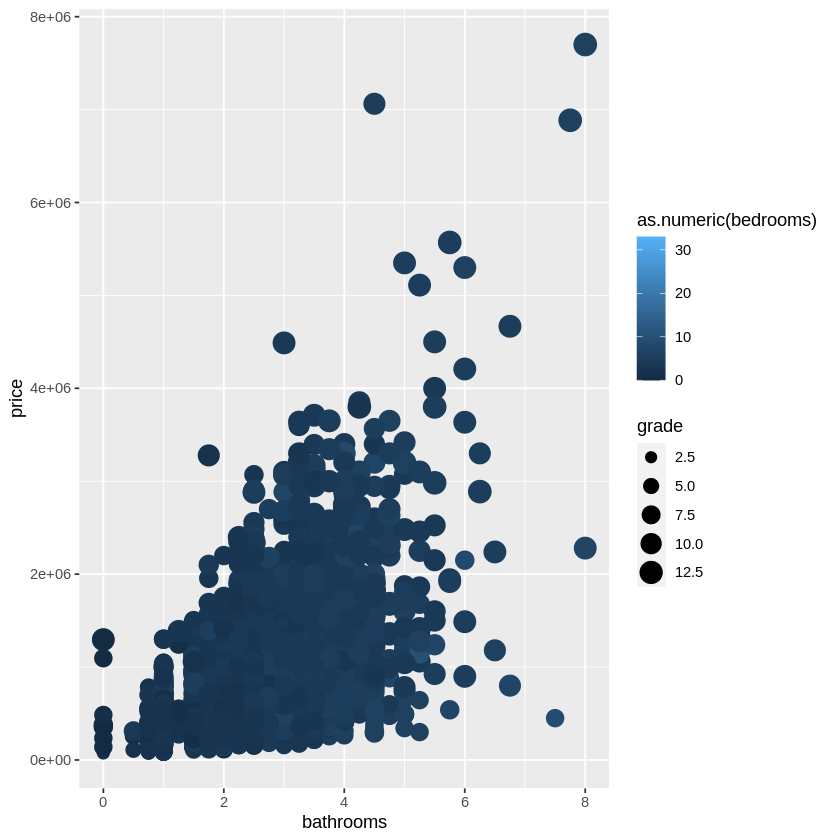

In [19]:
# library(ggplot2)
ggplot(housing_prices, aes(x=bathrooms, y=price, size=grade, color=as.numeric(bedrooms))) + xlab("bathrooms") + ylab("price") +
  geom_point()

Again, if the number of observations are less the plot would have helped us in seeing trends in the data. We can see price is positively varying with number of bathrooms but we cannot form clear conclusions from bedrooms and grade. We are not able to see clear trends between price, bedrooms, and grade.

We were able to use the five dimensions lat, long, price, bathrooms, and view in some of the plots above but we want to see the effect of sqft_living on prices. Unfortunately, we can't visualize it on the plot as we are running out of options. So there is a limit to the advantages of visualizations. We have to get back to numerical statistics to understand relationships between features when the number of dimensions are more than a graph can handle.

### Descriptive Statistics on Vectors

We tried to do descriptive statistics on data in the beginning using summary() function. Let's dive in a bit more into data exploration.

In [20]:
# Use sapply() to get means for all variables in data frame housing_prices
# Since we don't have NA values in the data, we don't have to worry about excluding missing values. In case you have any, 
# you can do it by inclusing "na.rm=TRUE" as the third parameter in below command.

#Also, date and colors are factor variables. You cannot apply mean() on them. We have to exclude them while finding mean.
sapply(housing_prices[,!names(housing_prices) %in% c('date','colors')], mean)

id         price      bedrooms     bathrooms   sqft_living 
 4.580302e+09  5.400881e+05  3.370842e+00  2.114757e+00  2.079900e+03 
     sqft_lot        floors    waterfront          view     condition 
 1.510697e+04  1.494309e+00  7.541757e-03  2.343034e-01  3.409430e+00 
        grade    sqft_above sqft_basement      yr_built  yr_renovated 
 7.656873e+00  1.788391e+03  2.915090e+02  1.971005e+03  8.440226e+01 
      zipcode           lat          long sqft_living15    sqft_lot15 
 9.807794e+04  4.756005e+01 -1.222139e+02  1.986552e+03  1.276846e+04

Subset the data based on yr_built and run a summary on the new sub datasets. subset1 should have data before year 1990 (including 1990) and subset2 should have data with yr_built after 1990.

In [21]:
subset1=subset(housing_prices,yr_built <= 1990)
summary(subset1)

       id                date               price            bedrooms     
 Min.   :1.200e+06   Length:14936       Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.115e+09   Class :character   1st Qu.: 300000   1st Qu.: 3.000  
 Median :3.888e+09   Mode  :character   Median : 432000   Median : 3.000  
 Mean   :4.513e+09                      Mean   : 509201   Mean   : 3.311  
 3rd Qu.:7.228e+09                      3rd Qu.: 610000   3rd Qu.: 4.000  
 Max.   :9.900e+09                      Max.   :7700000   Max.   :33.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.000   1st Qu.: 1320   1st Qu.:   6000   1st Qu.:1.000  
 Median :1.750   Median : 1780   Median :   8160   Median :1.000  
 Mean   :1.875   Mean   : 1903   Mean   :  14822   Mean   :1.268  
 3rd Qu.:2.500   3rd Qu.: 2320   3rd Qu.:  11304   3rd Qu.:1.500  
 Max.   :8.000   Max.   :12050   Max.   :1651359   Max.   :3.500  
   wat

In [22]:
subset2=subset(housing_prices,yr_built > 1990)
summary(subset2)

       id                date               price            bedrooms     
 Min.   :1.000e+06   Length:6677        Min.   : 154000   Min.   : 0.000  
 1st Qu.:2.215e+09   Class :character   1st Qu.: 360000   1st Qu.: 3.000  
 Median :4.014e+09   Mode  :character   Median : 500000   Median : 3.000  
 Mean   :4.730e+09                      Mean   : 609180   Mean   : 3.504  
 3rd Qu.:7.684e+09                      3rd Qu.: 720000   3rd Qu.: 4.000  
 Max.   :9.895e+09                      Max.   :6885000   Max.   :10.000  
   bathrooms      sqft_living       sqft_lot           floors   
 Min.   :0.000   Min.   :  384   Min.   :    572   Min.   :1.0  
 1st Qu.:2.500   1st Qu.: 1690   1st Qu.:   3610   1st Qu.:2.0  
 Median :2.500   Median : 2330   Median :   5876   Median :2.0  
 Mean   :2.651   Mean   : 2476   Mean   :  15744   Mean   :2.0  
 3rd Qu.:2.750   3rd Qu.: 3040   3rd Qu.:   9096   3rd Qu.:2.0  
 Max.   :8.000   Max.   :13540   Max.   :1024068   Max.   :3.5  
   waterfront       

In [23]:
#one-way table.  
table(housing_prices$bedrooms)


   0    1    2    3    4    5    6    7    8    9   10   11   33 
  13  199 2760 9824 6882 1601  272   38   13    6    3    1    1 

In [24]:
# Two-way table. Below command will produce a 2-way table with distribution count of every combination between bedrooms and price. 
#addmargins() will give the summary or sum of this counts at the end.
bed_vs_bath = table(housing_prices$bedrooms,housing_prices$bathrooms)
addmargins(bed_vs_bath)

,0,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,⋯,5.5,5.75,6,6.25,6.5,6.75,7.5,7.75,8,Sum
0,7,0,1,1,0,1,0,0,0,3,⋯,0,0,0,0,0,0,0,0,0,13
1,3,1,27,138,2,12,4,6,4,2,⋯,0,0,0,0,0,0,0,0,0,199
2,0,2,26,1558,3,294,304,216,118,197,⋯,0,0,0,0,0,0,0,0,0,2760
3,0,0,16,1780,4,829,1870,1048,1082,2357,⋯,0,0,0,0,0,0,0,0,0,9824
4,0,1,2,325,0,254,719,525,709,2502,⋯,5,1,0,0,0,0,0,0,0,6882
5,0,0,0,43,0,48,134,110,116,287,⋯,4,2,4,2,1,1,0,0,0,1601
6,0,0,0,6,0,6,16,24,15,29,⋯,0,0,1,0,1,0,0,1,1,272
7,0,0,0,1,0,2,0,0,3,2,⋯,1,1,0,0,0,1,0,0,1,38
8,0,0,0,0,0,0,0,0,0,1,⋯,0,0,1,0,0,0,0,0,0,13
9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,6


2-way tables are very informative. In the table above, we have the distribution of bathrooms for every count of bedrooms. It is very detailed and the sums of columns and rows are displayed, which indicate the number of bedrooms or bathrooms with a specific number. 

Down below is an extended version of the table command, adding a 3rd dimension to 2-way table. We can see the same information as above but for every kind of view (0,1,2,3,4).

In [25]:
bed_bath_view <- xtabs(~bedrooms+bathrooms+view, data=housing_prices)
bed_bath_view

, , view = 0

        bathrooms
bedrooms    0  0.5 0.75    1 1.25  1.5 1.75    2 2.25  2.5 2.75    3 3.25  3.5
      0     5    0    1    1    0    1    0    0    0    3    0    0    0    0
      1     3    1   23  127    1   12    4    5    3    2    0    0    0    0
      2     0    2   20 1465    3  274  264  203  105  176   17   13    5    1
      3     0    0   15 1737    2  785 1717  964 1001 2164  216  156  147  113
      4     0    1    1  309    0  237  642  484  649 2329  543  277  186  298
      5     0    0    0   41    0   44  117  104  101  257  192  136   92  119
      6     0    0    0    6    0    6   15   22   12   26   19   43    7   15
      7     0    0    0    1    0    2    0    0    3    2    3    2    1    3
      8     0    0    0    0    0    0    0    0    0    1    3    2    1    0
      9     0    0    0    0    0    0    0    0    0    0    0    2    0    0
      10    0    0    0    0    0    0    0    1    0    0    0    1    0    0
      11    0    0  

Let's plot barplots using the table commands. Essentially, a bar plot works like a table command.

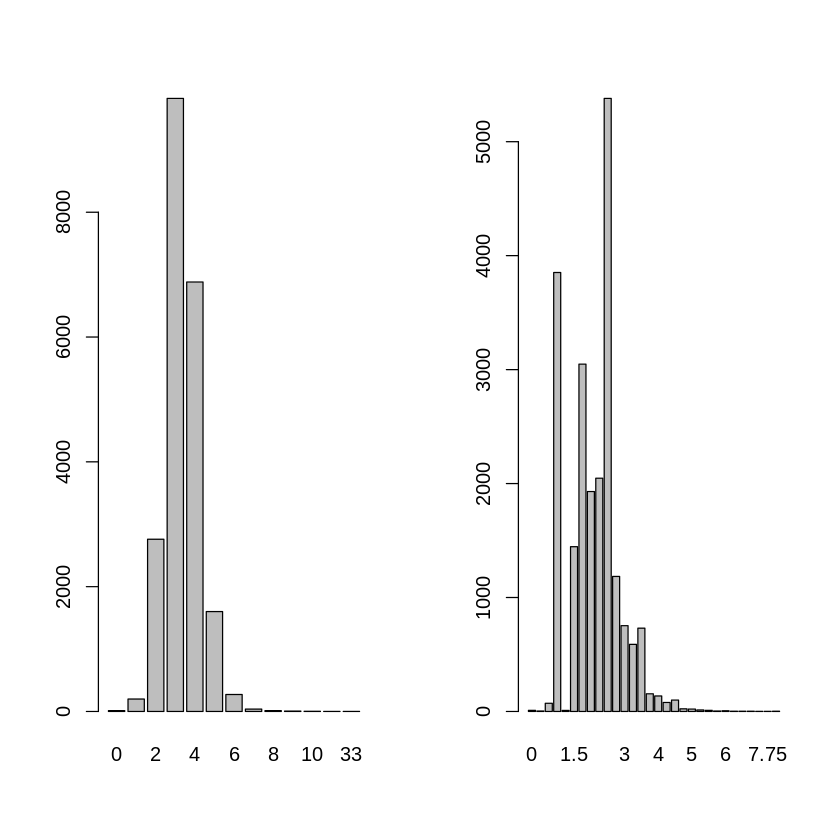

In [26]:
par(mfrow=c(1,2))
barplot(margin.table(bed_vs_bath,1))
barplot(margin.table(bed_vs_bath,2))

In [27]:
# install.packages("pastecs",repo="https://cran.cnr.berkeley.edu/")
library(pastecs)

In [28]:
#The stat.desc() function gives an elaborate descriptive statistics of input object. Most of the statistics are well known and 
#commonly used.
options(scipen=999)
stat.desc(housing_prices)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,colors
,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
nbr.val,21613.0000000,NA,21613.0000000,21613.000000000,21613.00000000,21613.0000000,21613.000000,21613.000000000,21613.0000000000,21613.000000000,⋯,21613.000000,21613.000000,21613.00000000,21613.000000,21613.0000000000,21613.000000000,21613.0000000000,21613.0000000,21613.000000,NA
nbr.null,0.0000000,NA,0.0000000,13.000000000,10.00000000,0.0000000,0.000000,0.000000000,21450.0000000000,19489.000000000,⋯,0.000000,13126.000000,0.00000000,20699.000000,0.0000000000,0.000000000,0.0000000000,0.0000000,0.000000,NA
nbr.na,0.0000000,NA,0.0000000,0.000000000,0.00000000,0.0000000,0.000000,0.000000000,0.0000000000,0.000000000,⋯,0.000000,0.000000,0.00000000,0.000000,0.0000000000,0.000000000,0.0000000000,0.0000000,0.000000,NA
min,1000102.0000000,NA,75000.0000000,0.000000000,0.00000000,290.0000000,520.000000,1.000000000,0.0000000000,0.000000000,⋯,290.000000,0.000000,1900.00000000,0.000000,98001.0000000000,47.155900000,-122.5190000000,399.0000000,651.000000,NA
max,9900000190.0000000,NA,7700000.0000000,33.000000000,8.00000000,13540.0000000,1651359.000000,3.500000000,1.0000000000,4.000000000,⋯,9410.000000,4820.000000,2015.00000000,2015.000000,98199.0000000000,47.777600000,-121.3150000000,6210.0000000,871200.000000,NA
range,9899000088.0000000,NA,7625000.0000000,33.000000000,8.00000000,13250.0000000,1650839.000000,2.500000000,1.0000000000,4.000000000,⋯,9120.000000,4820.000000,115.00000000,2015.000000,198.0000000000,0.621700000,1.2040000000,5811.0000000,870549.000000,NA
sum,98994056770455.0000000,NA,11672925008.0000000,72854.000000000,45706.25000000,44952873.0000000,326506890.000000,32296.500000000,163.0000000000,5064.000000000,⋯,38652488.000000,6300385.000000,42599334.00000000,1824186.000000,2119758513.0000000000,1027915.415100000,-2641408.9430000000,42935359.0000000,275964632.000000,NA
median,3904930410.0000000,NA,450000.0000000,3.000000000,2.25000000,1910.0000000,7618.000000,1.500000000,0.0000000000,0.000000000,⋯,1560.000000,0.000000,1975.00000000,0.000000,98065.0000000000,47.571800000,-122.2300000000,1840.0000000,7620.000000,NA
mean,4580301520.8649883,NA,540088.1417665,3.370841623,2.11475732,2079.8997363,15106.967566,1.494308981,0.0075417573,0.234303428,⋯,1788.390691,291.509045,1971.00513580,84.402258,98077.9398047471,47.560052519,-122.2138964049,1986.5524916,12768.455652,NA


From the table above, we can see there are 13 rows of data where the number of bedrooms are 0. Most of these rows also have no of bathrooms as 0. Let's take a look at these rows.

In [29]:
housing_prices[housing_prices$bedrooms==0,]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,colors
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>
876,6306400140,20140612T000000,1095000,0,0.00,3064,4764,3.5,0,2,⋯,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,green
3120,3918400017,20150205T000000,380000,0,0.00,1470,979,3.0,0,2,⋯,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,green
3468,1453602309,20140805T000000,288000,0,1.50,1430,1650,3.0,0,0,⋯,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,red
4869,6896300380,20141002T000000,228000,0,1.00,390,5900,1.0,0,0,⋯,390,0,1953,0,98118,47.5260,-122.261,2170,6000,red
6995,2954400190,20140624T000000,1295650,0,0.00,4810,28008,2.0,0,0,⋯,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,red
8478,2569500210,20141117T000000,339950,0,2.50,2290,8319,2.0,0,0,⋯,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,red
8485,2310060040,20140925T000000,240000,0,2.50,1810,5669,2.0,0,0,⋯,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,red
9774,3374500520,20150429T000000,355000,0,0.00,2460,8049,2.0,0,0,⋯,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,red
9855,7849202190,20141223T000000,235000,0,0.00,1470,4800,2.0,0,0,⋯,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,red


The rows of data above appear to be outliers; there are no bedrooms for 13 rows and no bathrooms for some of them. Also, two rows have a price greater than `$1` million. We can go ahead and delete them from the dataset.

In [30]:
housing_prices=housing_prices[!housing_prices$bedrooms %in% c(0),]

Let's see how the prices vary using a five number summary function. Also we will draw a boxplot for price and view to show how boxplots give five number summaries.

[1]   370.0  1428.5  1910.0  2550.0 13540.0

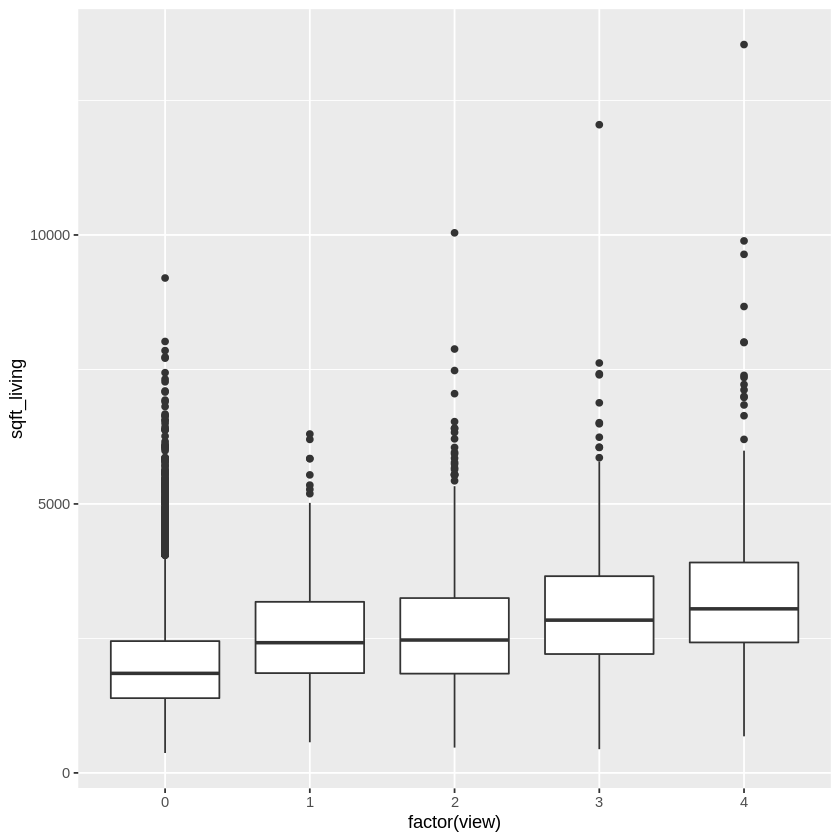

In [31]:
# Boxplot elements. Returns Tukey's five number summary (minimum, lower-hinge, median, upper-hinge, maximum)"
fivenum(housing_prices$sqft_living)

library(ggplot2)
ggplot(housing_prices, aes(factor(view), sqft_living)) + geom_boxplot()

In [32]:
which.max(housing_prices$price) # Determines the location, i.e., index of the (first) minimum or maximum of a numeric vector"

#This is similar for which.min()


[1] 7248

In [33]:
# Mode by frequencies:
# We have seen the use of table command before. Here we are trying to get the best out of it. First, we are trying to get the 
#distribution of all zip codes. Sort command will sort the counts in ascending order. So the '-' sign will get elements in 
#descending order. But we are interested in names or the zip codes instead of their counts. So, finally the names() function 
#will give us the names of maximum number of zip codes that appeared in the dataset. 
names(sort(-table(housing_prices$zipcode)))

[1] "98103" "98038" "98115" "98052" "98117" "98042" "98034" "98118" "98023"
[10] "98006" "98133" "98059" "98058" "98155" "98074" "98033" "98027" "98125"
[19] "98056" "98053" "98001" "98075" "98126" "98092" "98144" "98106" "98116"
[28] "98029" "98004" "98199" "98065" "98122" "98146" "98008" "98028" "98040"
[37] "98003" "98198" "98031" "98072" "98112" "98168" "98055" "98107" "98136"
[46] "98178" "98030" "98177" "98166" "98022" "98105" "98045" "98002" "98077"
[55] "98011" "98019" "98108" "98119" "98005" "98007" "98188" "98032" "98014"
[64] "98070" "98109" "98102" "98010" "98024" "98148" "98039"

In [34]:
# tapply()  Descriptive statistics by forming groups of data 
mean <- t(tapply(housing_prices$price,housing_prices$bedrooms, mean))
mean
# sd <- tapply(mydata$SAT,mydata$Gender, sd)

1,2,3,4,5,6,7,8,9,10,11,33
317642.9,401372.7,466232.1,635419.5,786599.8,825520.6,951184.7,1105077,893999.8,819333.3,520000,640000


The table above gives the average price of the house and the number of bedrooms in the house. The last two columns with number of bedrooms 11 and 33 seems like outliers. The price is very low compared to mean prices of 4 and 5 bedroom houses. We should look more in depth at 9 and 10 bedroom houses too. 

In [35]:
housing_prices[housing_prices$bedrooms>=9,]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,colors
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>
4097,1997200215,20140507T000000,599999,9,4.50,3830,6988,2.5,0,0,⋯,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291,red
4236,2902200015,20150106T000000,700000,9,3.00,3680,4400,2.0,0,0,⋯,2830,850,1908,0,98102,47.6374,-122.324,1960,2450,red
6080,9822700190,20140808T000000,1280000,9,4.50,3650,5000,2.0,0,0,⋯,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000,red
8547,424049043,20140811T000000,450000,9,7.50,4050,6504,2.0,0,0,⋯,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,red
8758,1773100755,20140821T000000,520000,11,3.00,3000,4960,2.0,0,0,⋯,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,red
13315,627300145,20140814T000000,1148000,10,5.25,4590,10920,1.0,0,2,⋯,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,green
15162,5566100170,20141029T000000,650000,10,2.00,3610,11914,2.0,0,0,⋯,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,red
15871,2402100895,20140625T000000,640000,33,1.75,1620,6000,1.0,0,0,⋯,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,red
16845,8823900290,20150317T000000,1400000,9,4.00,4620,5508,2.5,0,0,⋯,3870,750,1915,0,98105,47.6684,-122.309,2710,4320,red


The prices of 9 and 10 bedroom houses look reasonable but casts a shadow when we look at view and grade variables. Below is the definition for every grade. 


Grade represents the construction quality of improvements. Grades run from grade 1 to 13 and are defined as:

* 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

* 4 Generally older, low quality construction. Does not meet code.

* 5 Low construction costs and workmanship. Small, simple design.

* 6 Lowest grade currently meeting building code. Low quality materials and simple designs.

* 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

* 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

* 9 Better architectural design with extra interior and exterior design and quality.

* 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

* 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

* 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

* 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

Definitions taken from http://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r


**Most of the houses are built long time ago and are not renovated. May be thats the reason for poor grade of the houses. **

In [36]:
#Aggregate works just like groupby in sql. Here we are grouping data based on bedrooms. We are interested in columns price, 
#bathrooms and  sqft_living. Finally applying the mean function to this subset of data for every group of data (i.e. number of bedrooms)

aggregate(housing_prices[c("price","bathrooms","sqft_living")],by=list(bedrooms=housing_prices$bedrooms), mean)

bedrooms,price,bathrooms,sqft_living
<int>,<dbl>,<dbl>,<dbl>
1,317642.9,1.066583,884.6131
2,401372.7,1.401721,1239.7529
3,466232.1,1.968394,1805.8372
4,635419.5,2.436428,2554.6497
5,786599.8,2.778576,3047.5453
6,825520.6,3.068015,3284.3419
7,951184.7,3.651316,3974.2105
8,1105076.9,3.557692,3800.0000
9,893999.8,4.416667,3775.0000


In [37]:
#Below we are trying to aggregate data for price to show how bathrooms, bedrooms, sqft_living and view will help determine 
#the price.

price_analysis <- aggregate(housing_prices[c("price")],by=list(bedrooms=housing_prices$bedrooms, 
                            bathrooms=housing_prices$bathrooms, sqft_living=housing_prices$sqft_living, 
                            view=housing_prices$view), mean)
price_analysis <- price_analysis[order(price_analysis$price),]
head(price_analysis)

,bedrooms,bathrooms,sqft_living,view,price
,<int>,<dbl>,<int>,<int>,<dbl>
52,1,0.00,670,0,75000
7,1,0.75,430,0,80000
17,2,1.00,520,0,82500
87,1,0.75,760,0,95000
24,1,1.00,560,0,98000
48,2,0.75,660,0,100000


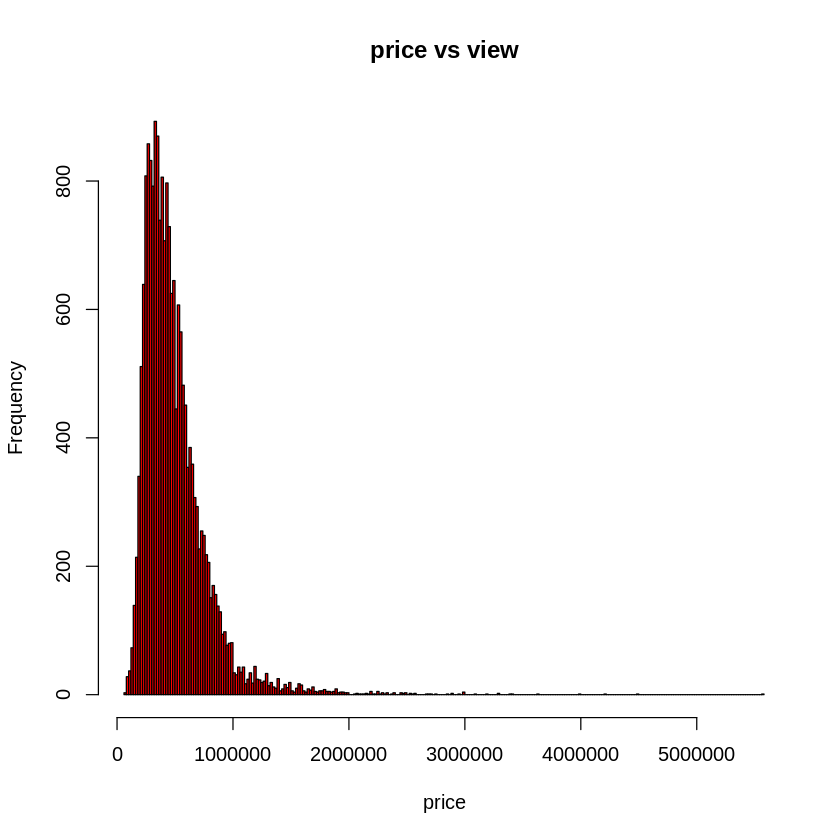

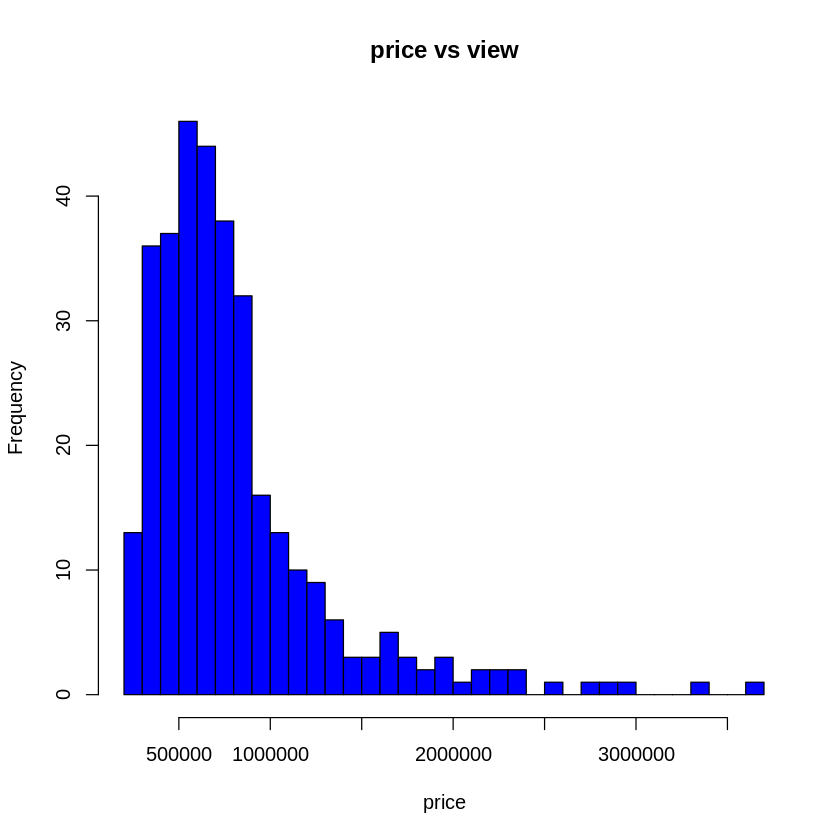

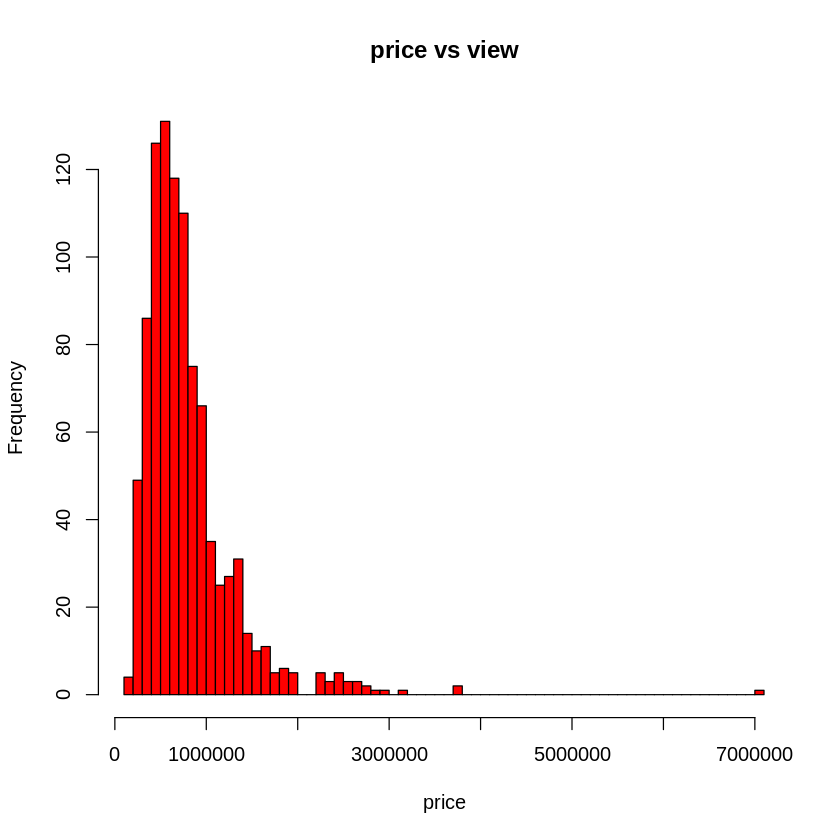

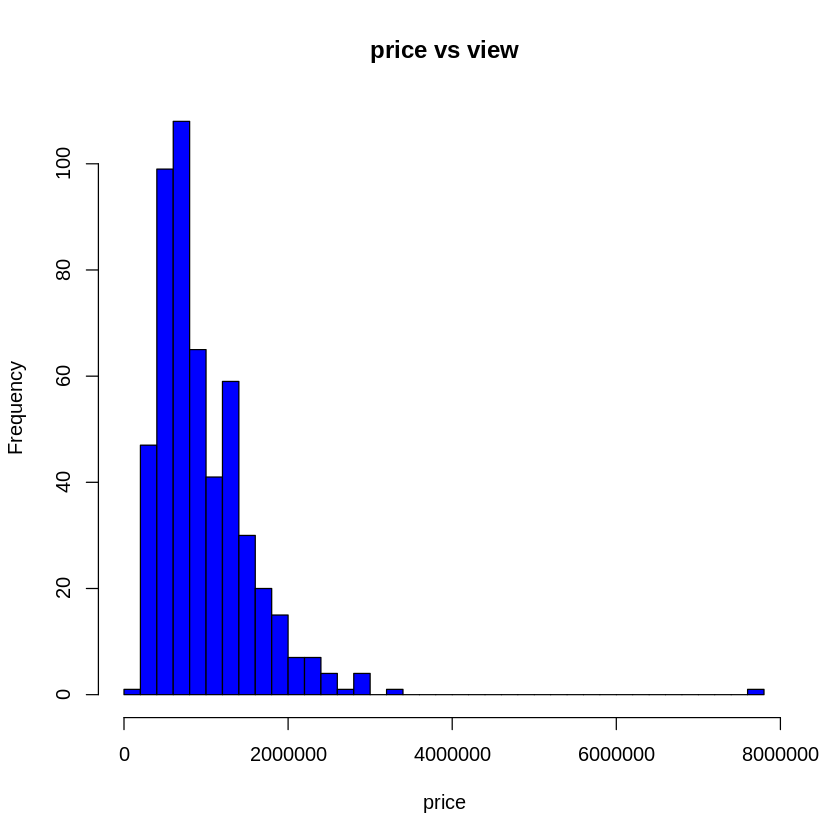

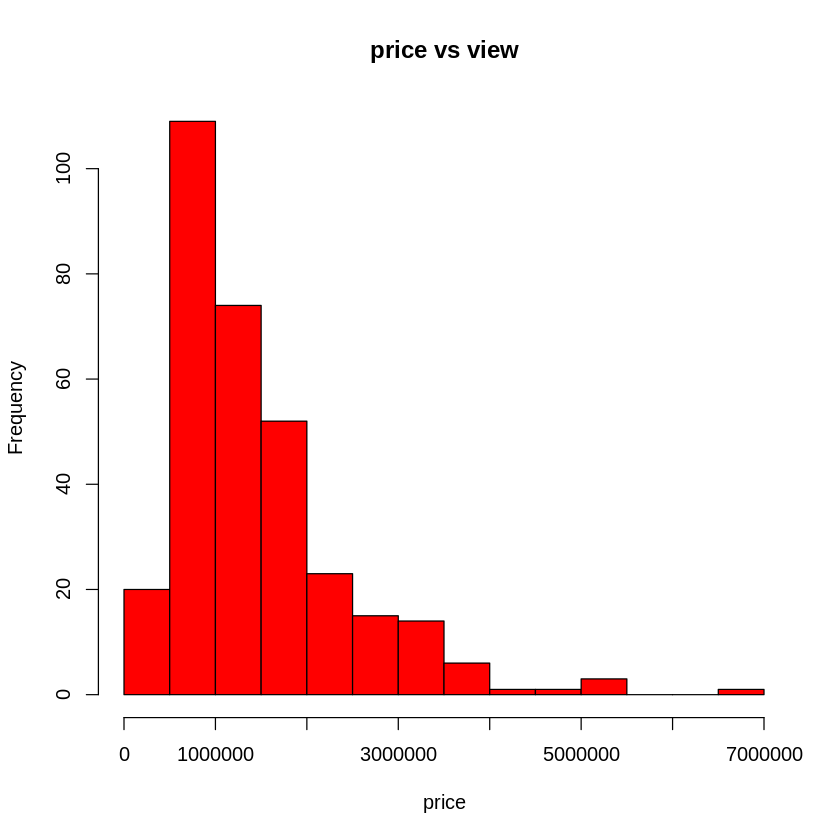

In [38]:
hist(housing_prices$price[housing_prices$view==0], breaks="FD", main="price vs view", xlab="price",col="red")
hist(housing_prices$price[housing_prices$view==1], breaks="FD", main="price vs view", xlab="price",col="blue")
hist(housing_prices$price[housing_prices$view==2], breaks="FD", main="price vs view", xlab="price",col="red")
hist(housing_prices$price[housing_prices$view==3], breaks="FD", main="price vs view", xlab="price",col="blue")
hist(housing_prices$price[housing_prices$view==4], breaks="FD", main="price vs view", xlab="price",col="red")